##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Network (CNN)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/cnn">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [31]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


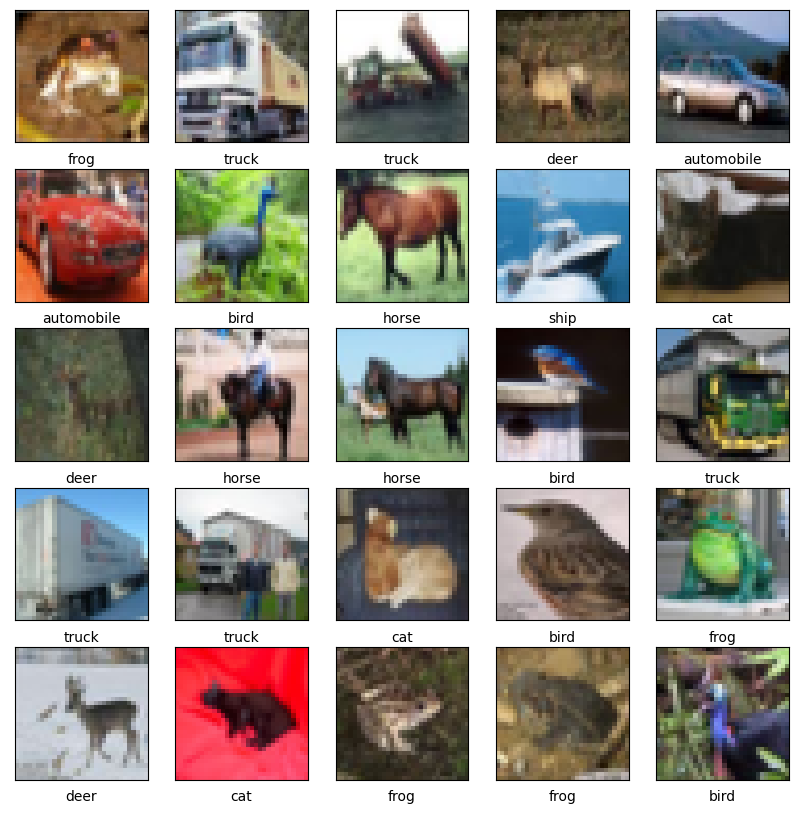

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


### original code for model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) # averages 2x2 (4) pixels into one pixel- shrinks image down
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # looks for 64 pieces
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

### original code for model
model.add(layers.Flatten()) # need to flatten because dense layers take 1D inputs
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

(3, 3), 2 strides, 2 epochs, accuracy was .598  

(3, 3), 3 strides, 2 epochs, accuracy was .609  

(6, 6), 1 stride, 2 epochs, accuracy was .100 and it took a LONG time  

- Epoch 1/2
     1563/1563 [==============================] - 239s 153ms/step - loss: 3.5152 - accuracy: 0.1013 - val_loss: 2.3026 -      val_accuracy: 0.1000
- Epoch 2/2
    1563/1563 [==============================] - 234s 150ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000  

(2, 2), 2 strides, 2 epochs, accuracy was .579  
(4,4), 2 strides, 2 epochs, accuracy was .522  
(4,4), 1 strides, 2 epochs, accuracy was .589 and it also took awhile

Of all of these, the (3,3) 3 strides, 2 epochs was the best  
With 10 epochs, and those settings and with data augmentation, the accuracy was only .102 - will forego augmentation

In [38]:
window = (3,3)
stride = 3 
model = models.Sequential()
# looking for 32 features, window size is 3x3
model.add(layers.Conv2D(32, window, padding='same', input_shape=(32, 32, 3)))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(32, window))
model.add(layers.LeakyReLU())
model.add(layers.Conv2D(32, window, strides=stride))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, window))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, window))
model.add(layers.LeakyReLU())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, window, strides=stride))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten()) # need to flatten because dense layers take 1D inputs
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Let's display the architecture of your model so far:

model.summary()

### Compile and train the model

In [39]:
### original compile and fit cell, without data augmentation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # from logits=True automatically one hot encodes
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6286 - accuracy: 0.4073 - val_loss: 1.3993 - val_accuracy: 0.5036
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2859 - accuracy: 0.5407 - val_loss: 1.1810 - val_accuracy: 0.5795
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1430 - accuracy: 0.5953 - val_loss: 0.9623 - val_accuracy: 0.6609
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0590 - accuracy: 0.6247 - val_loss: 0.9532 - val_accuracy: 0.6713
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0124 - accuracy: 0.6464 - val_loss: 0.9292 - val_accuracy: 0.6827
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9772 - accuracy: 0.6563 - val_loss: 0.8794 - val_accuracy: 0.6897
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9452 - accuracy: 0.6690 - val_loss: 0.8314 -

### if it doesn't help, don't use data augmentation
### ImageDataGenerator - duplicates a random subset of the original data, changes it somehow (flips, stretches, or shifts the images)to train model with more data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip=True,
                           vertical_flip=False)

model.compile(optimizer='adam',
              # from logits=True automatically one hot encodes
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(datagen.flow(train_images, train_labels, batch_size=256),
                    steps_per_epoch=int(np.ceil(train_images.shape[0]/256.0)),
                    epochs=10, validation_data=(test_images, test_labels))

### Evaluate the model

313/313 - 2s - loss: 0.8172 - accuracy: 0.7178 - 2s/epoch - 7ms/step


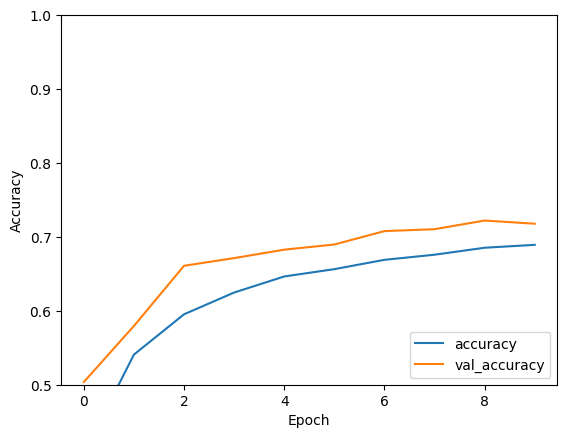

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [41]:
print(test_acc)

0.7178000211715698


In [42]:
model.save('default-cifar-10-cnn')
model = tf.keras.models.load_model('default-cifar-10-cnn')

INFO:tensorflow:Assets written to: default-cifar-10-cnn\assets


INFO:tensorflow:Assets written to: default-cifar-10-cnn\assets


1/1 [==============================] - 0s 251ms/step
predicting:  frog
answer is:  frog


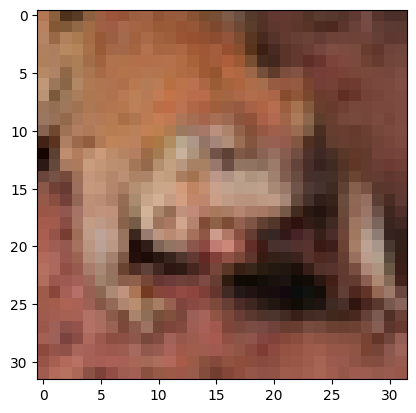

In [43]:
index = 5
plt.imshow(test_images[index])
test = np.expand_dims(test_images[index], axis = 0)
pred = model.predict(test)
lbl = test_labels[index]

idx = pred.argmax() # predictions one-hot encoded
print("predicting: ", class_names[idx])
print("answer is: ", class_names[lbl[0]]) # label is a single number


%pip install --upgrade imageio
%pip install --upgrade scikit-image
%pip install --upgrade ipywidgets

widgets.FileUpload(
    accept='.jpg',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

In [62]:
import imageio
from skimage.transform import resize
def predict_image(sender):
    filename = input_text.value + '.jpg'
    input_text.value = ''
    img = imageio.imread(filename)
    img = resize(img, (32,32))
    plt.imshow(img)
    print(img.shape)
    
    test = np.expand_dims(img, axis=0)
    pred = model.predict(test)[0]
    
    idx = pred.argmax()
    print(class_names[idx])

(32, 32, 3)
1/1 [==============================] - 0s 14ms/step
automobile


C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


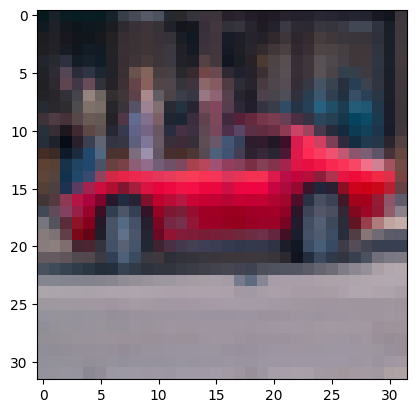

In [64]:
from ipywidgets import widgets

submit = widgets.Button(description='Submit')
submit.on_click(predict_image)
widgets.HBox([input_text, submit])

C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


(32, 32, 3)
1/1 [==============================] - 0s 16ms/step
automobile


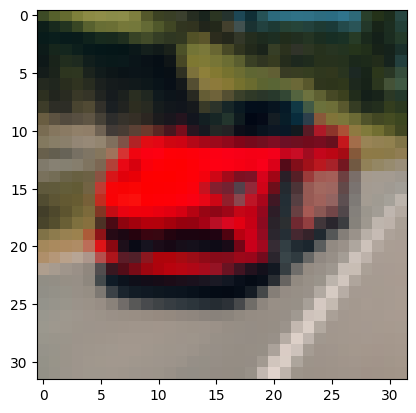

In [65]:
submit = widgets.Button(description='Submit')
submit.on_click(predict_image)
widgets.HBox([input_text, submit])

C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


(32, 32, 3)
1/1 [==============================] - 0s 22ms/step
automobile


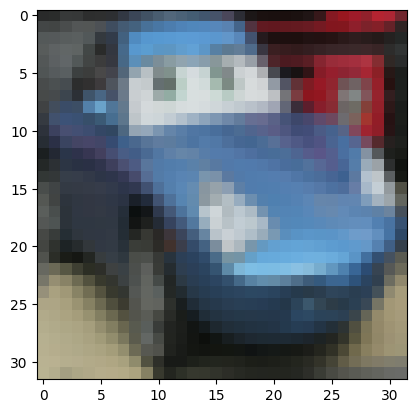

In [66]:
submit = widgets.Button(description='Submit')
submit.on_click(predict_image)
widgets.HBox([input_text, submit])

(32, 32, 3)
1/1 [==============================] - 0s 16ms/step
airplane


C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


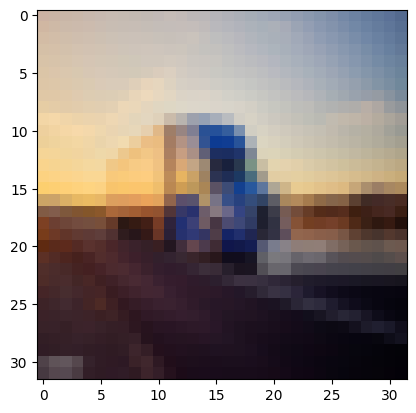

In [67]:
submit = widgets.Button(description='Submit')
submit.on_click(predict_image)
widgets.HBox([input_text, submit])

C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


(32, 32, 3)
1/1 [==============================] - 0s 16ms/step
cat


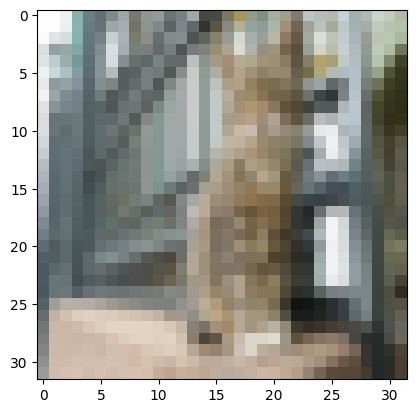

C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


(32, 32, 3)
1/1 [==============================] - 0s 16ms/step
cat


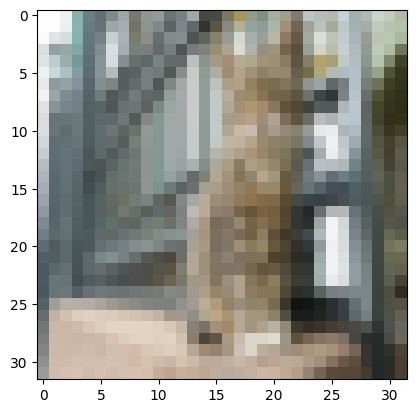

C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


(32, 32, 3)
1/1 [==============================] - 0s 22ms/step
cat


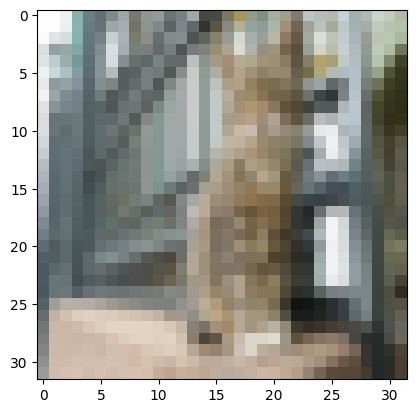

In [68]:
submit = widgets.Button(description='Submit')
submit.on_click(predict_image)
widgets.HBox([input_text, submit])

C:\Users\celes\AppData\Local\Temp\ipykernel_22076\730659550.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


(32, 32, 3)
1/1 [==============================] - 0s 2ms/step
cat


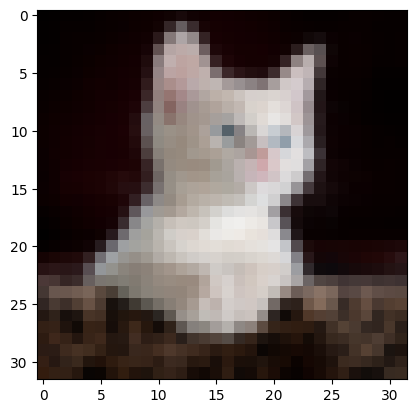

In [69]:
submit = widgets.Button(description='Submit')
submit.on_click(predict_image)
widgets.HBox([input_text, submit])